<a href="https://colab.research.google.com/github/lopeztanya033/Clusterizacion-Clientes-de-Comercio-Minorista/blob/main/Tarea_Clustering__Grupal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade scikit-learn

**Conjunto de Datos: Clientes de Comercio Minorista**
# Descripción:
El conjunto de datos representa información de clientes de una tienda minorista. Cada fila corresponde a un cliente diferente.

**Variables**
* ID_Cliente: Número de identificación único para cada cliente.
* Edad: Edad del cliente.
* Ingreso_Anual: Ingresos anuales del cliente en miles de dólares.
* Puntuacion_Gasto: Una puntuación asignada por la tienda basada en el comportamiento de gasto del cliente (1-100).
* Categoría_Principal: La categoría principal de productos que el cliente compra (por ejemplo, Electrónica, Ropa, Alimentos, Hogar).
* Visitas_Mes: Número de visitas a la tienda en el último mes.

In [ ]:
import pandas as pd
import numpy as np
import os
os.environ['OMP_NUM_THREADS'] = '2'

# Creando un conjunto de datos ficticio
np.random.seed(0)  # Para reproducibilidad

# Generando datos aleatorios para cada columna
ID_Cliente = np.arange(1, 501)
Edad = np.random.randint(18, 70, size=500)
Ingreso_Anual = np.random.randint(15, 120, size=500)  # Ingreso en miles
Puntuacion_Gasto = np.random.randint(1, 101, size=500)
Categoría_Principal = np.random.choice(['Ropa', 'Electrónica', 'Hogar', 'Alimentos', 'Entretenimiento','Juegos de Video'], size=500)
Visitas_Mes = np.random.randint(1, 15, size=500)

# Creando el DataFrame
data = {
    'ID_Cliente': ID_Cliente,
    'Edad': Edad,
    'Ingreso_Anual': Ingreso_Anual,
    'Puntuacion_Gasto': Puntuacion_Gasto,
    'Categoría_Principal': Categoría_Principal,
    'Visitas_Mes': Visitas_Mes
}

df_clientes = pd.DataFrame(data)

# Mostrando las primeras filas del DataFrame para verificar
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_Cliente           500 non-null    int32 
 1   Edad                 500 non-null    int32 
 2   Ingreso_Anual        500 non-null    int32 
 3   Puntuacion_Gasto     500 non-null    int32 
 4   Categoría_Principal  500 non-null    object
 5   Visitas_Mes          500 non-null    int32 
dtypes: int32(5), object(1)
memory usage: 13.8+ KB


In [ ]:
df_clientes.head()

# **Tarea: Aplicación de K-Means en Clustering de Clientes**
**Objetivo:**
Utilizar el método K-Means para identificar segmentos de clientes en el conjunto de datos de comercio minorista.

**Instrucciones:**

**Exploración de Datos:**
Carga el conjunto de datos y realiza un análisis exploratorio básico. Incluye estadísticas descriptivas y visualizaciones para entender la distribución de los datos.

**Preprocesamiento:**
Limpia y preprocesa los datos según sea necesario. Esto puede incluir la codificación de variables categóricas y la normalización de variables numéricas.
Trata cualquier valor faltante o atípico de manera adecuada.

**Implementación de K-Means:**
Aplica el algoritmo K-Means al conjunto de datos. Experimenta con diferentes números de clusters (por ejemplo, k=3, k=5, k=7) y elige el número óptimo basándote en el método del codo u otros criterios relevantes.
Describe cómo inicializaste los centroides y cómo afectó esto los resultados.

**Análisis de los Clusters:**
Analiza los clusters formados. Describe las características distintivas de cada cluster en términos de las variables proporcionadas (edad, ingreso anual, puntuación de gasto, etc.).
Visualiza los resultados utilizando gráficos apropiados (por ejemplo, diagramas de dispersión).

**Interpretación y Aplicación Comercial:**
Interpreta cada cluster en términos de su significado comercial. Por ejemplo, ¿qué estrategias de marketing podrían ser efectivas para cada grupo?
Proporciona recomendaciones sobre cómo la tienda podría abordar mejor las necesidades de cada segmento de clientes.

**Informe:**
Escribe un informe detallado que incluya tu código, análisis, interpretaciones y conclusiones. Asegúrate de que el informe sea claro y bien organizado.

In [ ]:
###  Exploración de Datos: Carga el conjunto de datos y realiza un análisis exploratorio básico. Incluye estadísticas descriptivas y visualizaciones para entender la distribución de los datos
import matplotlib.pyplot as plt
import seaborn as sns

df_clientes.rename(columns={
    'ID_Cliente': 'id',
    'Edad': 'eda',
    'Ingreso_Anual': 'ing',
    'Puntuacion_Gasto': 'pun',
    'Categoría_Principal ': 'cat',
    'Visitas_Mes': 'vis'
} , inplace= True)


#Ropa', 'Electrónica', 'Hogar', 'Alimentos', 'Entretenimiento','Juegos de Video'
mapeo = {'Ropa': 0,
         'Electrónica': 1,
         'Hogar': 2,
         'Alimentos': 3 ,
         'Entretenimiento': 4,
         'Juegos de Video': 5
        }
df_clientes['nca']= df_clientes['Categoría_Principal'].map(mapeo)


In [ ]:
df_clientes

In [ ]:
df_clientes

C:\Users\tlopez\AppData\Local\Temp\ipykernel_236\248040366.py:1: FutureWarning: The provided callable <function sum at 0x000002577E3F5BC0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_agrupado_nca  = df_clientes.groupby('Categoría_Principal').agg({'ing': np.sum,
C:\Users\tlopez\AppData\Local\Temp\ipykernel_236\248040366.py:1: FutureWarning: The provided callable <function sum at 0x000002577E3F5BC0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_agrupado_nca  = df_clientes.groupby('Categoría_Principal').agg({'ing': np.sum,


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Alimentos'),
  Text(1, 0, 'Electrónica'),
  Text(2, 0, 'Entretenimiento'),
  Text(3, 0, 'Hogar'),
  Text(4, 0, 'Juegos de Video'),
  Text(5, 0, 'Ropa')])

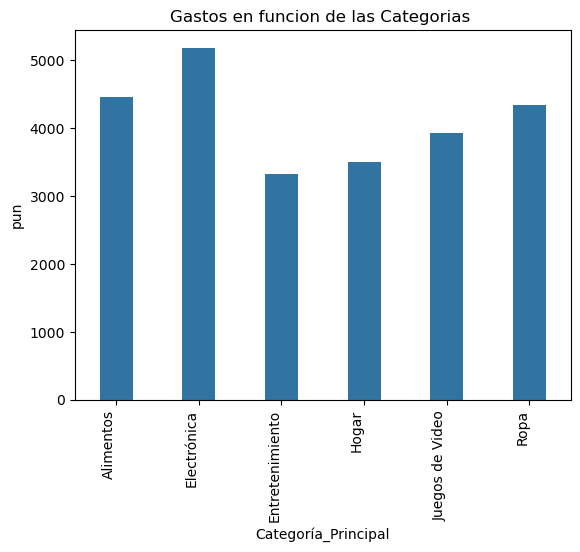

In [ ]:
df_agrupado_nca  = df_clientes.groupby('Categoría_Principal').agg({'ing': np.sum,
                                                   'pun': np.sum
                                                   }).reset_index()

sns.barplot(
    df_agrupado_nca,
    x='Categoría_Principal',
    y='pun',
    width=0.4
).set(title='Gastos en funcion de las Categorias ')
plt.xticks(rotation=90, ha='right')

In [ ]:
Se gaastas mas en la categoria 1 .- Electronica   y 3.- Alimentos y como ultimo punto 4.- entretenimiento

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 2, figsize= (11,5))
sns.histplot(df_clientes['eda'], kde= True, ax=ax[0,0], bins= 10)
ax[0,0].set_title('Distribucion de la edad')
ax[0,0].set_xlabel('edad')
ax[0,0].set_ylabel('Cantidad')

sns.histplot(df_clientes['ing'], kde= True, ax=ax[0,1], bins = 10)
ax[0,1].set_title('Distribucion Ingreso')
ax[0,1].set_xlabel('Ingreso')
ax[0,1].set_ylabel('Cantidad')

sns.histplot(df_clientes['pun'], kde=True, ax=ax[1,0] , bins= 10 )
ax[1,0].set_title('Distribucion Puntuacion')
ax[1,0].set_xlabel('Puntuacion ')
ax[1,0].set_ylabel('Cantidad')

sns.histplot(df_clientes['vis'], kde=True, ax=ax[1,1] , bins= 10 )
ax[1,1].set_title('Distribucion Visitas')
ax[1,1].set_xlabel('Visitas ')
ax[1,1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()



In [ ]:
df_clientes.describe()

In [ ]:
## Edad entre 18 y 60 to y edad promedio 43
# inf  entre $15 y $119  promedio: 68
# pun   hay 2 pios alto   20 y 60 ;   prom: 49
# visitas  altos 6 y 14 visas: pormedio 7.9  casi 8
# categoria en la que mas concurrida  1: Teconolgia y 3:Alimentos igual seguida 0=:Ropa y 5:VideoJuegos

<Axes: title={'center': 'Categoria'}, xlabel='nca'>

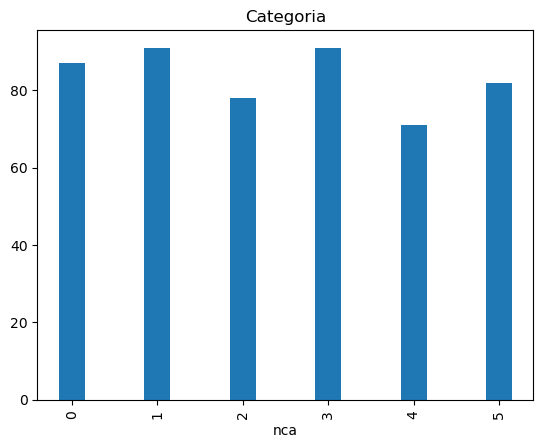

In [ ]:
df_categoria = df_clientes.groupby('nca')['id'].count()

df_categoria.plot.bar(
    y='nca',
    title ='Categoria',
    width= 0.3
)


In [ ]:
df_categoria.sort_values(ascending= False)

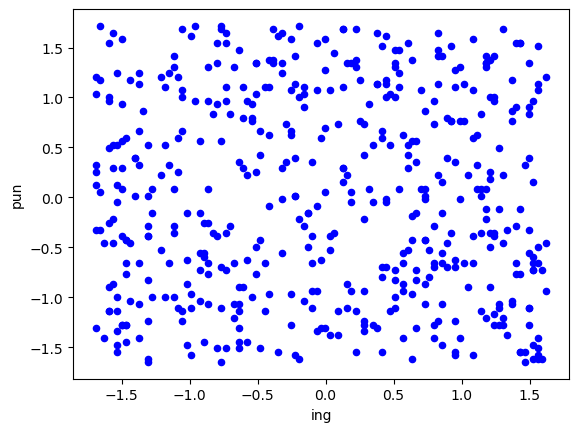

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

features = df_clientes[['eda','ing','pun', 'vis']]

features.isna().sum()

### escalar
scaler = StandardScaler()
###  devueve array de nunpoy
df_normado= scaler.fit_transform(features)
# Convertir el array NumPy a un DataFrame de pandas
df_normado_df  = pd.DataFrame(df_normado, columns=features.columns)
df_normado_df.plot.scatter(x='ing', y='pun',color='blue')
plt.show()

In [ ]:
# Método del codo para encontrar el número óptimo de clusters
silhouette_scores = []
range_clusters = range(1,11)

##df_normado = scaler.fit_transform(df_normado)
for i in range_clusters:
    model = KMeans(n_clusters = i, random_state=42 )
    model.fit(df_normado_df)
    silhouette_scores.append(model.inertia_)


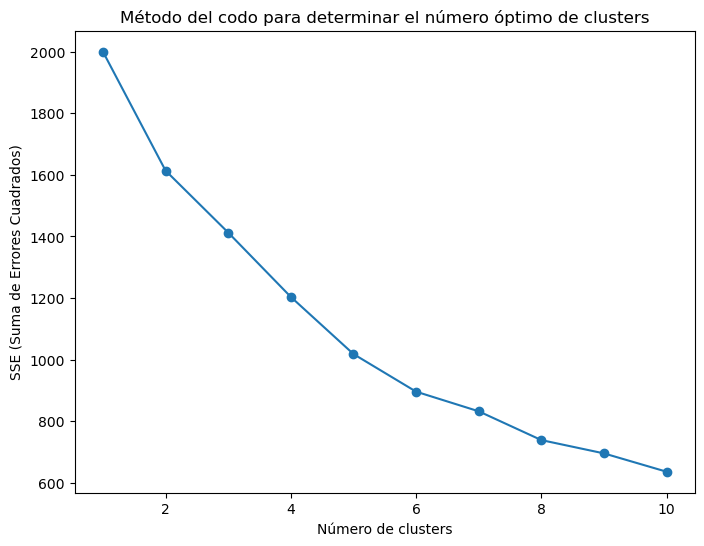

In [ ]:
# Gráfica del método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE (Suma de Errores Cuadrados)')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

In [ ]:
silhouette_scores

In [ ]:
range_clusters[ np.argmax(silhouette_scores)]

In [ ]:
optimal_k = 5 # Asume que 3 es el número óptimo de clusters basado en las gráficas
kmeans = KMeans(n_clusters=optimal_k, random_state = 42)
kmeans.fit(df_normado_df)
clusters = kmeans.labels_
df_clientes['cluster'] = clusters


In [ ]:
Cliente_clusterizados = df_clientes.groupby('cluster') [['eda','ing','pun', 'vis']].mean()
Cliente_clusterizados

,eda,ing,pun,vis
cluster,,,,
0,59.568421,49.442105,68.042105,8.589474
1,31.425532,71.436170,67.893617,12.021277
2,47.233645,100.280374,23.644860,8.588785
3,37.608696,82.978261,72.673913,3.619565
4,39.991071,37.928571,23.991071,6.723214


In [ ]:
df_normado_df

,eda,ing,pun,vis
0,1.246018,0.954962,1.104434,-1.711207
1,1.444978,0.731781,0.085019,0.024297
2,-1.672057,-1.117438,-0.288766,-1.711207
3,-1.473098,0.668014,0.356863,1.511872
4,-1.473098,1.433208,1.546180,-1.463278
...,...,...,...,...
495,-1.274138,1.528858,-0.730512,1.511872
496,-1.075178,1.273793,-0.118864,1.263943
497,0.118580,-0.384127,1.682102,0.520155
498,1.444978,-0.416010,1.104434,0.272226


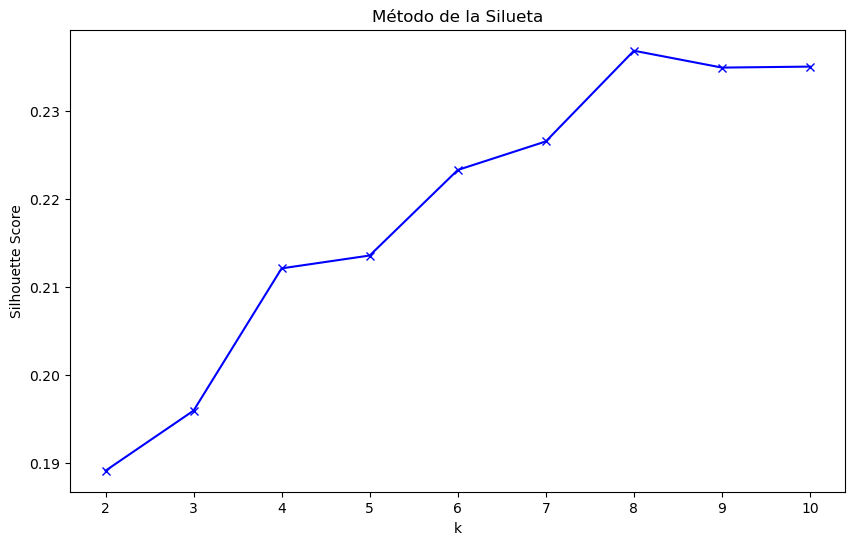

In [ ]:
### Metodos de la silueta :
# Método de la silueta
silhouette_scores = []
K = range(2, 11)  # Comienza desde 2 porque la silueta no está definida para k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normado_df)
    score = silhouette_score(df_normado_df, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el método de la silueta
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Método de la Silueta')
plt.show()

# Seleccionar el número óptimo de clusters basado en los resultados
k_optimo = K[np.argmax(silhouette_scores)]
###  print('NUmero de cluester ', k_optimo )


In [ ]:
clusters

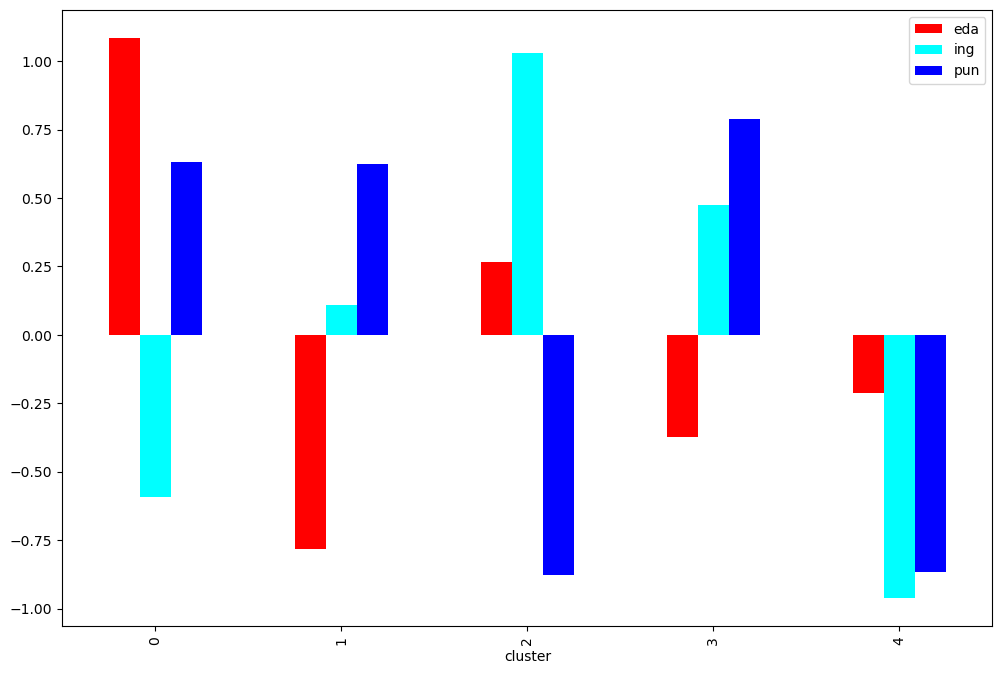

In [ ]:
df_normado_df['cluster'] = clusters
df_normado_df = df_normado_df.groupby('cluster') [['eda','ing','pun']].mean()
df_normado_df
colores = ['red', 'cyan', 'blue']
df_normado_df.plot(kind='bar', figsize=(12, 8), color = colores )
plt.show()

Text(0, 0.5, 'Gastos')

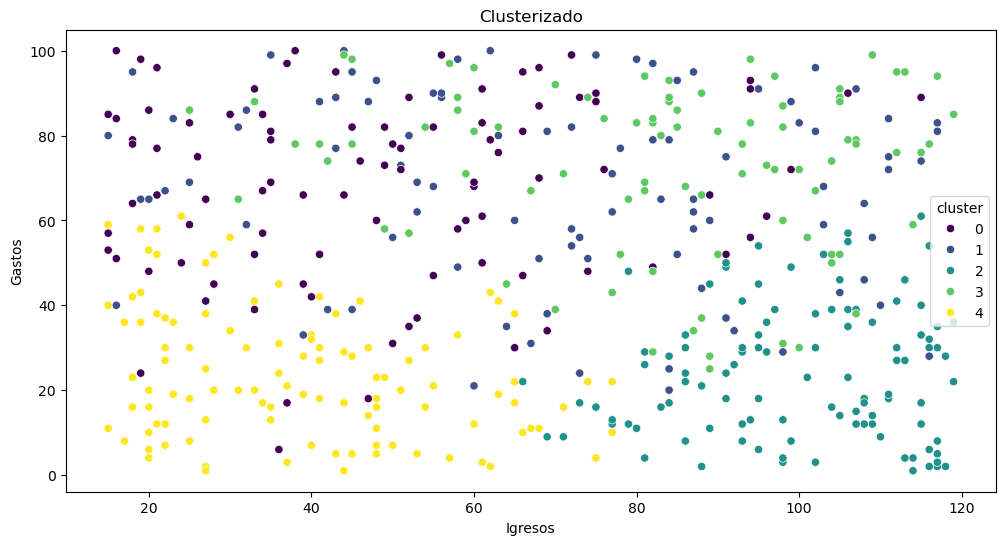

In [ ]:
### Visualiza Clusters.

plt.figure(figsize=(12,6))
sns.scatterplot(x='ing', y='pun', hue='cluster', data=df_clientes, palette='viridis')
plt.title("Clusterizado")
plt.xlabel('Igresos')
plt.ylabel('Gastos')


In [ ]:
###  Grafico de Barras
df_agrupado = df_clientes.groupby('cluster')[['ing','pun','vis']].mean()


In [ ]:
df_agrupado

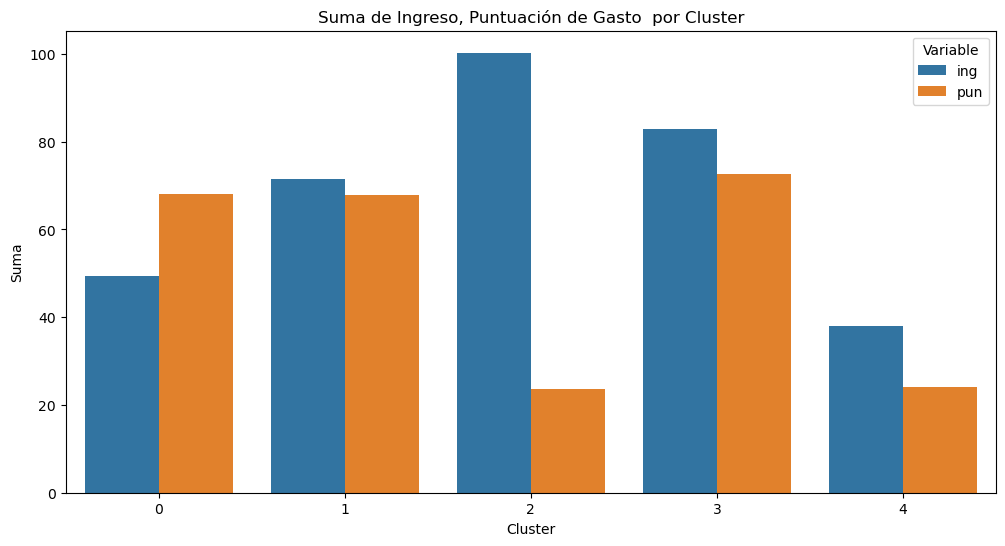

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes el DataFrame df_clientes y los clusters asignados

# Agrupar por 'cluster' y sumar las columnas 'ing', 'pun' y 'vis'
df_agrupado = df_clientes.groupby('cluster')[['ing', 'pun']].mean().reset_index()

# Transformar el DataFrame para graficar
df_agrupado_melted = pd.melt(df_agrupado, id_vars='cluster', var_name='Variable', value_name='Suma')

# Graficar las sumas para cada cluster y variable
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='Suma', hue='Variable', data=df_agrupado_melted)
plt.title('Suma de Ingreso, Puntuación de Gasto  por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Suma')
plt.legend(title='Variable')
plt.show()

In [ ]:
## ----  Analisis
Clúster 0: ingresos bajos, alto gasto
Enfoque : Planes de salud económicos, seguros de vida ajustados, planes de ahorro para emergencias, servicios de asistencia médica a domicilio.

Clúster 1: Ingresos medio y altos Gastos
Enfoque: Crear campañas de marketing enfocadas en la educación financiera y el manejo del presupuesto.

Clúster 2: Los ingresos las altos de los clústeres y muy reservado en gastos .  Cautelosos.-
Enfoque: Proporcionar servicios de gestión patrimonial personalizados y experiencias únicas, como viajes VIP o acceso a eventos exclusivos.

Clúster 3: Ingreso medio y que gastos medios ..
Enfoque: Ofrecer simuladores financieros y herramientas de planificación para ayudar a este grupo a equilibrar sus ingresos y gastos.

Clúster 4:   Ingreso Bajo y gasto Bajo.
Enfoque: Desarrollar aplicaciones móviles que ofrezcan consejos financieros básicos y promociones para abrir cuentas bancarias sin costos adicionales.
Podrias ser estudiantes o personas que están comenzando su carrera profesional y aún no tienen grandes responsabilidades financieras./ Migrante
